

# Importando bibliotecas e a Base de Dados

In [ ]:
#importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#importando base de dados e criando uma variavel extra
df_diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv', decimal='.')
df_var = df_diabetes


# Analise exploratoria

In [ ]:
#Exibindo as 10 primeiras linhas
df_diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
#verificando detalhes sobre o df
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df_diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#verificando se tem colunas NAN no df,
df_var.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
#Apenas contando os valores possiveis que cada registro pode assumir na coluna
df_var['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
#O df esta muito desbalanceado
df_var['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

<ipython-input-40-f43069f9f6ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_var.corr()


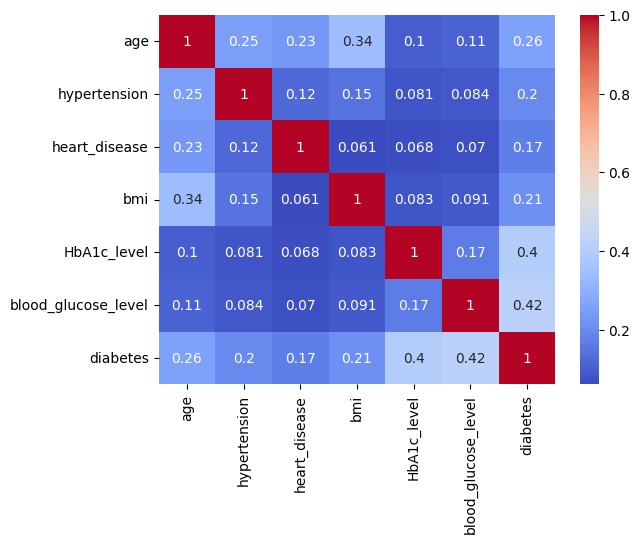

In [ ]:
# Calcular matriz de correlação
correlation_matrix = df_var.corr()

# Visualizar a matriz de correlação em um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

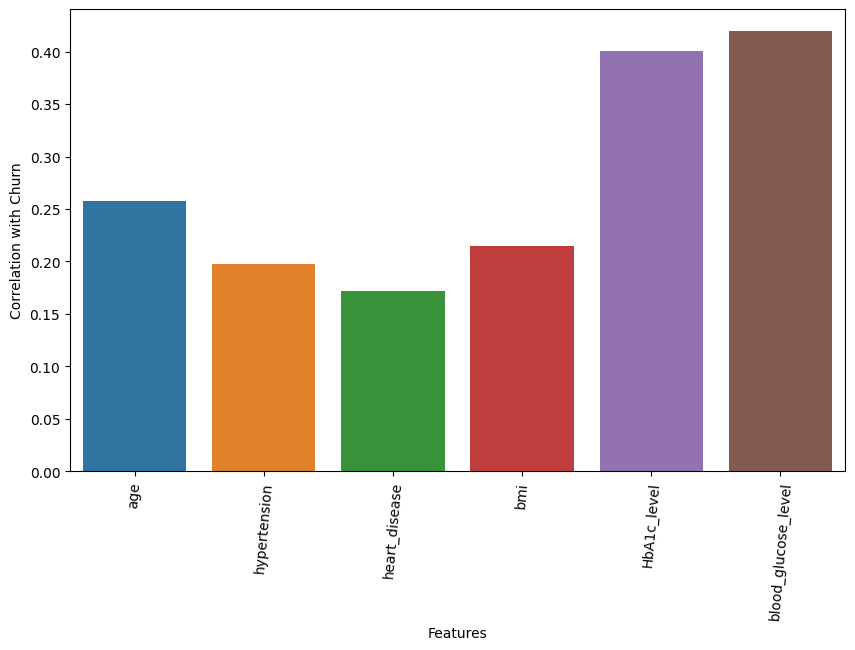

In [ ]:

# Seleciona a coluna 'Churn' da matriz de correlação
diab_correlation = correlation_matrix['diabetes']

# Remove a correlação com a própria feature 'Churn'
diab_correlation = diab_correlation.drop('diabetes')

# Plota um gráfico de barras da correlação
plt.figure(figsize=(10, 6))  # Defina o tamanho da figura
sns.barplot(x=diab_correlation.index, y=diab_correlation.values)
plt.xticks(rotation=85)

plt.xlabel('Features')
plt.ylabel('Correlation with Churn')

plt.show()

Existe apenas relaçoes positivas entre as variaveis, e as variaveis com a realação mais forte com a classe diabetes são blood_glucose_level e HbA1c_level respectivamente !

In [ ]:
grafico1 = px.parallel_categories(df_var, dimensions=['blood_glucose_level','diabetes'])
grafico1.show()

A relaçao fica mais evidente, pois as pessoas com diabetes apresentão uma blood_glucose_level mais elevada, enquanto as pessoas com valores mais baixos vai exatamente na contra mão

In [ ]:
grafico2 = px.parallel_categories(df_var, dimensions=['HbA1c_level','diabetes'])
grafico2.show()

In [ ]:
grafico33 = px.parallel_categories(df_var, dimensions=['bmi','diabetes'])
grafico33.show()

HbA1c_level mantem o mesmo comportamento, os valores mais altos são fortemente relacionados com pessoas com diabetes

---



In [ ]:
#visualisando a distribuição da das pessoas com diabetes dentro das subpartes da variavel smoking_history
grafico3  = px.treemap(df_var, path=['smoking_history','diabetes'])
grafico3.show()

In [ ]:
'''                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level
'''
grafico3  = px.treemap(df_var, path=['bmi','diabetes'])
grafico3.show()

In [ ]:
data = pd.read_csv('/content/detalhe_votacao_secao_2020_SP.csv', sep=';',encoding='iso-8859-1')
data

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_CARGO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS_APU_SEP,NR_LOCAL_VOTACAO
0,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,448,294,154,248,13,17,16,0,1066
1,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,448,294,154,266,13,15,0,0,1066
2,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,449,292,157,256,18,18,0,0,1066
3,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,449,292,157,243,18,16,15,0,1066
4,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,448,267,181,234,7,26,0,0,1066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208136,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,325,250,75,207,17,20,6,0,1082
208137,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,327,251,76,201,21,18,11,0,1082
208138,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,327,251,76,209,16,26,0,0,1082
208139,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,333,253,80,209,12,32,0,0,1082


In [ ]:
data[data['NM_MUNICIPIO'] == 'MONGAGUÁ' ]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_CARGO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS_APU_SEP,NR_LOCAL_VOTACAO
75100,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,392,311,81,276,6,10,19,0,1198
75101,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,392,311,81,289,5,17,0,0,1198
75102,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,178,139,39,126,4,9,0,0,1201
75103,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,178,139,39,118,3,8,10,0,1201
75104,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,400,328,72,290,13,13,12,0,1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155045,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,415,274,141,249,3,11,11,0,1147
155046,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,392,302,90,267,16,9,10,0,1198
155047,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,PREFEITO,392,302,90,282,10,10,0,0,1198
155048,21/12/2020,18:19:08,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,VEREADOR,399,318,81,286,10,13,9,0,1198


In [ ]:
data1 = pd.read_csv('/content/votacao_candidato_munzona_2020_SP.csv', sep=';',encoding='iso-8859-1')
data1

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000114393,PARTIDO ISOLADO,PSDB,N,245,Válido,245,2,ELEITO POR QP
1,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000114393,PARTIDO ISOLADO,PSDB,N,268,Válido,268,2,ELEITO POR QP
2,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000099449,PARTIDO ISOLADO,PSL,N,79,Válido,79,5,SUPLENTE
3,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000099449,PARTIDO ISOLADO,PSL,N,46,Válido,46,5,SUPLENTE
4,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000099449,PARTIDO ISOLADO,PSL,N,131,Válido,131,5,SUPLENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238948,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000065737,PARTIDO ISOLADO,PSDB,N,12,Válido,12,5,SUPLENTE
238949,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000065737,PARTIDO ISOLADO,PSDB,N,524,Válido,524,2,ELEITO POR QP
238950,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000145864,PARTIDO ISOLADO,SOLIDARIEDADE,N,77,Válido,77,5,SUPLENTE
238951,20/06/2023,02:06:37,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,#NULO#,250000139861,PARTIDO ISOLADO,PSD,N,25,Válido,25,5,SUPLENTE


In [ ]:
data1[data1['NM_MUNICIPIO'] == 'MONGAGUÁ' ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 816 to 237631
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DT_GERACAO                 201 non-null    object
 1   HH_GERACAO                 201 non-null    object
 2   ANO_ELEICAO                201 non-null    int64 
 3   CD_TIPO_ELEICAO            201 non-null    int64 
 4   NM_TIPO_ELEICAO            201 non-null    object
 5   NR_TURNO                   201 non-null    int64 
 6   CD_ELEICAO                 201 non-null    int64 
 7   DS_ELEICAO                 201 non-null    object
 8   DT_ELEICAO                 201 non-null    object
 9   TP_ABRANGENCIA             201 non-null    object
 10  SG_UF                      201 non-null    object
 11  SG_UE                      201 non-null    int64 
 12  NM_UE                      201 non-null    object
 13  CD_MUNICIPIO               201 non-null    int64 
 14  NM_MU